In [1]:
text = """Roberto Baggio (born 18 February 1967) is a retired Italian footballer. He is widely regarded as one of the finest footballers of all time (4th at a Fifa internet poll; member of the Fifa World Cup Dream Team). Baggio won both the Ballon d’Or and the FIFA World Player of the Year in 1993. He is the only Italian player ever scoring in three World Cups. He is also one of the top 5 all-time goalscorers for Italy. Baggio is known as Il Divin Codino (The Divine Ponytail), for the hairstyle he wore for most of his career and his Buddhist background. """

In [2]:
text = text.lower()

In [3]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(text)
print(sentences[:5])

['roberto baggio (born 18 february 1967) is a retired italian footballer.', 'he is widely regarded as one of the finest footballers of all time (4th at a fifa internet poll; member of the fifa world cup dream team).', 'baggio won both the ballon d’or and the fifa world player of the year in 1993. he is the only italian player ever scoring in three world cups.', 'he is also one of the top 5 all-time goalscorers for italy.', 'baggio is known as il divin codino (the divine ponytail), for the hairstyle he wore for most of his career and his buddhist background.']


In [4]:
import re
pureSentences = [re.sub(r'[^\w\s]','',x) for x in sentences]
print(pureSentences[:5])

['roberto baggio born 18 february 1967 is a retired italian footballer', 'he is widely regarded as one of the finest footballers of all time 4th at a fifa internet poll member of the fifa world cup dream team', 'baggio won both the ballon dor and the fifa world player of the year in 1993 he is the only italian player ever scoring in three world cups', 'he is also one of the top 5 alltime goalscorers for italy', 'baggio is known as il divin codino the divine ponytail for the hairstyle he wore for most of his career and his buddhist background']


In [5]:
pureText = " ".join(pureSentences)
print(pureText)

roberto baggio born 18 february 1967 is a retired italian footballer he is widely regarded as one of the finest footballers of all time 4th at a fifa internet poll member of the fifa world cup dream team baggio won both the ballon dor and the fifa world player of the year in 1993 he is the only italian player ever scoring in three world cups he is also one of the top 5 alltime goalscorers for italy baggio is known as il divin codino the divine ponytail for the hairstyle he wore for most of his career and his buddhist background


In [6]:
splitText  = pureText.split(" ")
print("SplittedPureText:",splitText)

SplittedPureText: ['roberto', 'baggio', 'born', '18', 'february', '1967', 'is', 'a', 'retired', 'italian', 'footballer', 'he', 'is', 'widely', 'regarded', 'as', 'one', 'of', 'the', 'finest', 'footballers', 'of', 'all', 'time', '4th', 'at', 'a', 'fifa', 'internet', 'poll', 'member', 'of', 'the', 'fifa', 'world', 'cup', 'dream', 'team', 'baggio', 'won', 'both', 'the', 'ballon', 'dor', 'and', 'the', 'fifa', 'world', 'player', 'of', 'the', 'year', 'in', '1993', 'he', 'is', 'the', 'only', 'italian', 'player', 'ever', 'scoring', 'in', 'three', 'world', 'cups', 'he', 'is', 'also', 'one', 'of', 'the', 'top', '5', 'alltime', 'goalscorers', 'for', 'italy', 'baggio', 'is', 'known', 'as', 'il', 'divin', 'codino', 'the', 'divine', 'ponytail', 'for', 'the', 'hairstyle', 'he', 'wore', 'for', 'most', 'of', 'his', 'career', 'and', 'his', 'buddhist', 'background']


In [7]:
import networkx as nx
graph = nx.Graph()

In [8]:
graph.add_node(splitText[0])
for i in range(1,len(splitText)):
    graph.add_node(splitText[i])
    graph.add_edge(splitText[i-1],splitText[i],weight=1)

In [9]:
print("NumberOfNodes:",graph.number_of_nodes())
print("NumberOfEdges:",graph.number_of_edges())

NumberOfNodes: 66
NumberOfEdges: 93


In [10]:
print("Nodes:",graph.nodes())
print("Edges:",graph.edges())

Nodes: ['18', 'finest', 'the', 'his', 'cups', 'scoring', 'world', 'hairstyle', 'of', 'retired', 'widely', 'both', 'one', 'and', 'il', 'as', 'for', '1993', 'ponytail', 'baggio', 'top', 'ballon', 'he', 'ever', '1967', 'at', 'in', 'buddhist', 'dor', 'background', 'born', 'cup', 'time', 'regarded', '5', 'codino', 'dream', 'divine', 'internet', 'alltime', 'player', 'footballers', 'three', 'all', 'year', 'goalscorers', 'is', 'member', 'a', 'poll', 'won', 'most', 'roberto', 'team', 'known', 'only', 'italy', 'february', '4th', 'wore', 'italian', 'also', 'career', 'divin', 'fifa', 'footballer']
Edges: [('18', 'born'), ('18', 'february'), ('finest', 'footballers'), ('finest', 'the'), ('the', 'for'), ('the', 'ballon'), ('the', 'divine'), ('the', 'top'), ('the', 'only'), ('the', 'codino'), ('the', 'hairstyle'), ('the', 'of'), ('the', 'year'), ('the', 'both'), ('the', 'and'), ('the', 'is'), ('the', 'fifa'), ('his', 'and'), ('his', 'buddhist'), ('his', 'of'), ('his', 'career'), ('cups', 'he'), ('cup

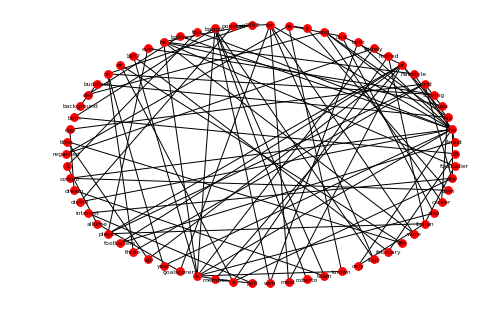

In [13]:
nx.draw_circular(graph,node_size=60,font_size=6,with_labels=True)

In [14]:
import matplotlib.pyplot as plt 
plt.savefig("a.pdf") # save graph to pdf file

In [16]:
from node2vec import Node2Vec

In [17]:
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4) 

Generating walks (CPU: 2):  96%|█████████▌| 48/50 [00:08<00:00,  5.01it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:08<00:00,  5.88it/s]


In [18]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [21]:
model.wv.most_similar("roberto")  # Output node names are always strings

[('baggio', 0.8117386698722839),
 ('team', 0.7690796852111816),
 ('italy', 0.7609966993331909),
 ('born', 0.7553281784057617),
 ('won', 0.7469189763069153),
 ('both', 0.4945812225341797),
 ('18', 0.49367764592170715),
 ('dream', 0.4697211980819702),
 ('february', 0.35397854447364807),
 ('is', 0.3327404260635376)]

In [20]:
model.wv.save_word2vec_format("save.txt")